In [25]:

import os, time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow import keras

categories = os.listdir("./archive/crop_images")
print(categories)

img_size = (224, 224)

crop_images = keras.preprocessing.image_dataset_from_directory( # Imagenes normales
    "./archive/crop_images",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=img_size,
    shuffle=True
)


['jute', 'maize', 'rice', 'sugarcane', 'wheat']
Found 201 files belonging to 5 classes.


In [26]:

kag2 = keras.preprocessing.image_dataset_from_directory( # Augmented images
    "./archive/kag2",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=img_size,
    shuffle=True
)


Found 804 files belonging to 5 classes.


In [27]:

test_crop_image = keras.preprocessing.image_dataset_from_directory( # Imagenes para el test
    "./archive/test_crop_image",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=img_size,
    shuffle=True
)


Found 45 files belonging to 2 classes.


In [28]:

base_model = keras.applications.MobileNet( # Podemos probar MobileNetV2 o V3
    input_shape=(*img_size, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

In [29]:

model = keras.Sequential([ # Se puede cambiar la red nueronal
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(16, activation="tanh"),
    keras.layers.Dense(len(categories), activation="softmax")
])


In [35]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [39]:
#images =kag2 + crop_images
images = crop_images
history = model.fit(images, batch_size=32, epochs=128, shuffle=True) # No se si el kag2 + crop_images este bien

Epoch 1/128
7/7 [==============================] - 4s 549ms/step - loss: 0.3813 - accuracy: 0.4179
Epoch 2/128
7/7 [==============================] - 4s 563ms/step - loss: 0.3835 - accuracy: 0.4080
Epoch 3/128
7/7 [==============================] - 4s 558ms/step - loss: 0.3821 - accuracy: 0.3930
Epoch 4/128
7/7 [==============================] - 4s 565ms/step - loss: 0.3833 - accuracy: 0.4080
Epoch 5/128
7/7 [==============================] - 4s 598ms/step - loss: 0.3802 - accuracy: 0.3881
Epoch 6/128
7/7 [==============================] - 4s 575ms/step - loss: 0.3824 - accuracy: 0.4080
Epoch 7/128
7/7 [==============================] - 4s 553ms/step - loss: 0.3830 - accuracy: 0.4080
Epoch 8/128
7/7 [==============================] - 4s 511ms/step - loss: 0.3810 - accuracy: 0.4129
Epoch 9/128
7/7 [==============================] - 4s 547ms/step - loss: 0.3807 - accuracy: 0.4080
Epoch 10/128
7/7 [==============================] - 4s 544ms/step - loss: 0.3805 - accuracy: 0.4080
Epoch 11/

7/7 [==============================] - 6s 769ms/step - loss: 0.4902 - accuracy: 0.1990
Epoch 84/128
7/7 [==============================] - 6s 749ms/step - loss: 0.4894 - accuracy: 0.2388
Epoch 85/128
7/7 [==============================] - 5s 669ms/step - loss: 0.4906 - accuracy: 0.2189
Epoch 86/128
7/7 [==============================] - 5s 697ms/step - loss: 0.4922 - accuracy: 0.2388
Epoch 87/128
7/7 [==============================] - 4s 612ms/step - loss: 0.4909 - accuracy: 0.2189
Epoch 88/128
7/7 [==============================] - 5s 634ms/step - loss: 0.4900 - accuracy: 0.2388
Epoch 89/128
7/7 [==============================] - 5s 712ms/step - loss: 0.4903 - accuracy: 0.2090
Epoch 90/128
7/7 [==============================] - 5s 663ms/step - loss: 0.4897 - accuracy: 0.2289
Epoch 91/128
7/7 [==============================] - 5s 625ms/step - loss: 0.4886 - accuracy: 0.2438
Epoch 92/128
7/7 [==============================] - 5s 685ms/step - loss: 0.4916 - accuracy: 0.2488
Epoch 93/128


In [38]:

model.evaluate(test_crop_image)

ValueError: in user code:

    File "C:\Users\riky_\anaconda3\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\riky_\anaconda3\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\riky_\anaconda3\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\riky_\anaconda3\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\riky_\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\riky_\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\riky_\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\riky_\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\riky_\anaconda3\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\riky_\anaconda3\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 5) vs (None, 2)).


In [49]:


def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    #ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["accuracy"])
    #ax2.plot(history.history["val_accuracy"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()
    



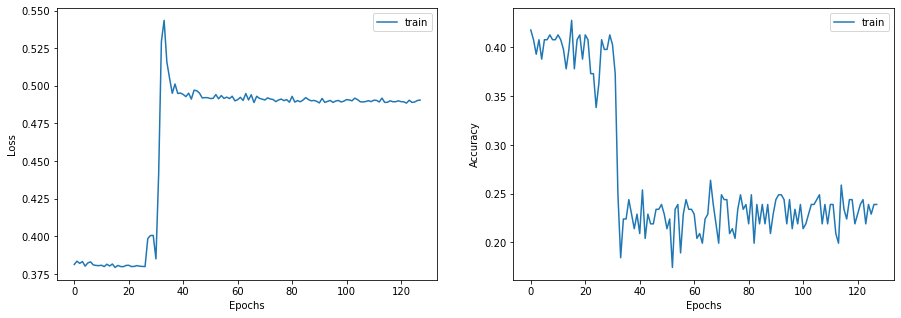

In [50]:
display_learning_curves(history)